In [1]:
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F, fileEncoding = "utf-8")
head(election)
library(dplyr)
library(plotrix)
library(stringr)
options(scipen = 100)
par(family = "AppleGothic")
options(warn = -1)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
election$투표율 <- election$투표수 / election$선거인수 * 100

In [3]:
a <- subset(election, 투표율 >= 75)

a$이재명 <- a$이재명 / a$투표수 * 100
a$윤석열 <- a$윤석열 / a$투표수 * 100

In [4]:
광역시도 <- count(a,광역시도)

In [5]:
b <- merge(x=광역시도, y=merge(count(subset(a,이재명 >= 50 ), 광역시도),count(subset(a,윤석열 >= 50 ), 광역시도),
           by.x="광역시도", by.y="광역시도", all.y=T, all.x=T)
           , by.x="광역시도", by.y="광역시도", all.x=T)

In [6]:
b[is.na(b)] <- 0


In [7]:
b

광역시도,n,n.x,n.y
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


In [8]:
b$광역시도

[1] "강원도"         "경기도"         "경상남도"       "경상북도"      
 [5] "광주광역시"     "대구광역시"     "대전광역시"     "부산광역시"    
 [9] "서울특별시"     "세종특별자치시" "울산광역시"     "인천광역시"    
[13] "전라남도"       "전라북도"       "충청남도"       "충청북도"

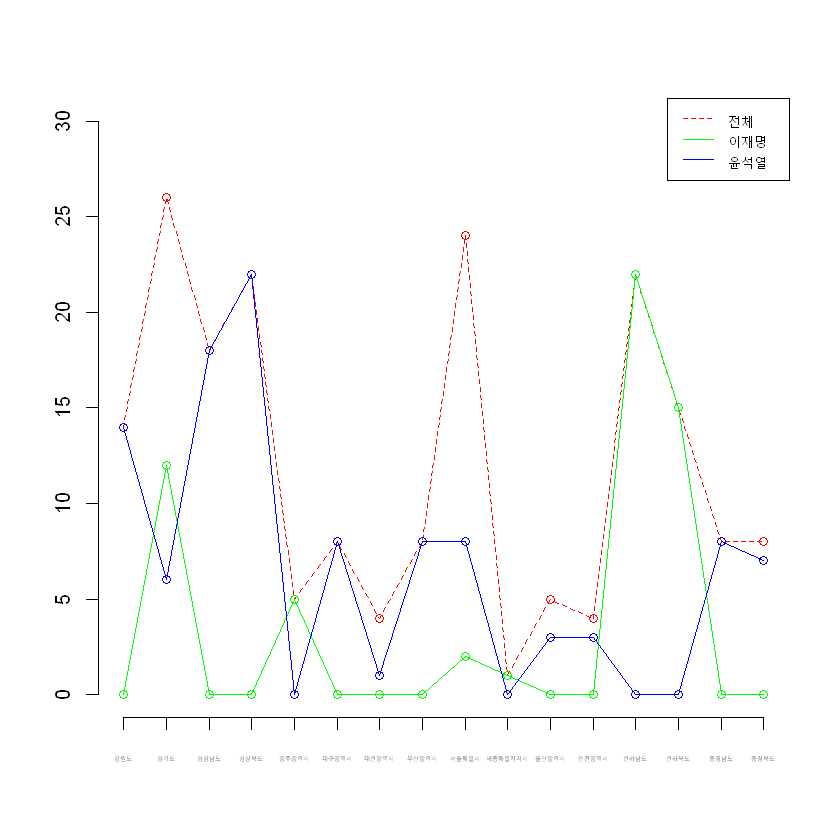

In [32]:
plot(b$n,
     type="o",
     ylim = c(0,30),
     col="red",
     axes = F,
     ann=F,
     lty=2
    )
axis(1, at=1:length(b$광역시도),lab=b$광역시도,cex.axis=0.4)
axis(2, ylim = c(0,30))
lines(b$n.x,
      type="o",
      col="green"
     )
lines(b$n.y,
      type="o",
      col="blue"
     )
legend("topright", # x, y 좌표
       c("전체", "이재명", "윤석열"),
       col = c("red", "green", "blue"),
       lty = c(2,1,1),
       cex = 0.8 )

In [25]:
help(axis)